# Functions used in Syllabus

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assitant Professor Vrije Universiteit Amsterdam<br>
Statistics and Data Analysis Course

## Learning goals:

* Show how the figures in the syllabus are made
* Get familiar with Jupyter and Python 

## Introduction

This Notebook is not part of the assignments, but just shows how some of the custrom figures used in the course syllabus are produced. It also serves as a repository for reproducing these figures for future versions of the syllabus.

## Figure 3: covariance and correlation examples
The code below creates variables `x` and `y` and colors datapoints based on how they contribute to the covariance between the variables.

In [29]:
# Import required packages
import pandas as pd # The 'pandas' package helps us to import and manage data
import random as random # To randomly sample data
import numpy as np # To modify and work with datasets
import scipy.stats as stats # The 'scipy' package contains statistical formulas we will need
import statsmodels.formula.api as smf # The 'statsmodels' package contains the functions needed to do regressions
import statsmodels.api as sm # The 'statsmodels' package contains the functions we need to run regression models
from scipy.stats import pearsonr # For calculating the Pearson's r
from sklearn.decomposition import PCA # Needed for PCA and principle axis analysis
import matplotlib.pyplot as plt # For plotting

# The line below allows us to visualize plots we make directly in the notebook
%matplotlib inline

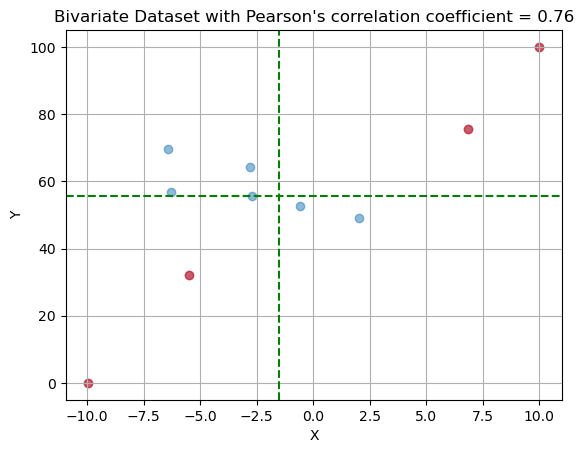

In [2]:
# Figure 3

# Define parameters
num_samples = 10
mean = [0, 0]
covariance_matrix = [[1, 0.6], [0.6, 1]]

# Generate bivariate dataset with Pearson's r correlation of 0.6
random.seed(0) # Set seed for reproducibility
x, y = np.random.multivariate_normal(mean, covariance_matrix, num_samples).T # create x and y variables from a normal distribution

# Scale x values to range between -10 and 10
x = x * 10 / max(abs(x))

# Scale y values to range between 0 and 100
y = (y - min(y)) * 100 / (max(y) - min(y))

# Check the actual correlation coefficient
correlation_coefficient, p_value = pearsonr(x, y)

# Calculate mean values of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a mask for points above and below mean values
mask_above = (x >= mean_x) & (y >= mean_y)
mask_below = (x <= mean_x) & (y <= mean_y)

# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha = 0.5, label = 'negative covariance contribution') # Plot points
plt.scatter(x[mask_above], y[mask_above], color = 'red', alpha = 0.5, label = 'positive covariance contribution') # color points with values for both x and y above the means red (positive contribution to covariance)
plt.scatter(x[mask_below], y[mask_below], color = 'red', alpha = 0.5, label = 'positive covariance contribution') # color points with values for both x and y below the means red (positive contribution to covariance)
plt.axhline(mean_y, color = 'green', linestyle = '--', label = 'Mean Y')
plt.axvline(mean_x, color = 'green', linestyle = '--', label = 'Mean X')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Dataset with Pearson\'s correlation coefficient = ' + str(round(correlation_coefficient, 2)))
plt.grid(True)
plt.show()

The code below does the same, but with y being related to x by a second order polinomial (quadratic function). The linear correlation is very small (-0.03)

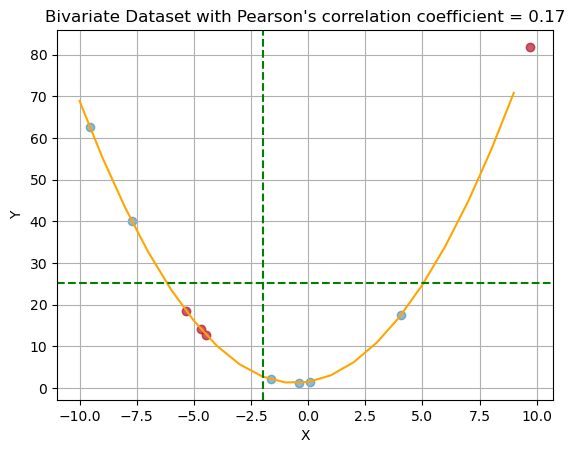

In [3]:
# Define parameters
num_samples = 10
x_range = (-10, 10)

# Generate x values
random.seed(5)
x = np.random.uniform(x_range[0], x_range[1], num_samples)

# Compute y values based on a quadratic function of x plus
a, b, c = np.random.uniform(-2, 2, 3) # coefficients for the quadratic function
y = a * x**2 + b * x + c

# Check the actual correlation coefficient
correlation_coefficient2, p_value2 = pearsonr(x, y)

# Fit a second-order polynomial curve to the data
smoothed_y = np.polyval((a, b, c), range(-10, 10))

# Calculate mean values of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a mask for points above and below mean values
mask_above = (x > mean_x) & (y > mean_y)
mask_below = (x < mean_x) & (y < mean_y)

# Plot the data with different colors
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha=0.5, label = 'negative covariance contribution') # Plot points
plt.scatter(x[mask_above], y[mask_above], color='red', alpha=0.5, label = 'positive covariance contribution') # color points with values for both x and y above the means red (positive contribution to covariance)
plt.scatter(x[mask_below], y[mask_below], color='red', alpha=0.5, label = 'positive covariance contribution') # color points with values for both x and y below the means red (positive contribution to covariance)
plt.plot(range(-10, 10), smoothed_y, color='orange', label='Smoothed Curve') # Plot polynomial function through points
plt.axhline(mean_y, color='green', linestyle='--', label='Mean Y')
plt.axvline(mean_x, color='green', linestyle='--', label='Mean X')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Dataset with Pearson\'s correlation coefficient = ' + str(round(correlation_coefficient2, 2)))
plt.grid(True)
plt.show()

## Figure 5: Scatterplot of the elevation and soil organic matter weight % variables

(5.0, 40.0)

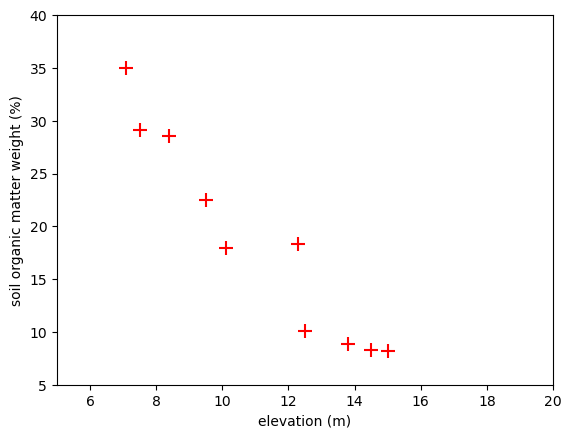

In [4]:
# Define variables
elev = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil = np.array([8.2, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 28.6, 29.1, 35])

# Create scatterplot
plt.scatter(elev, OMsoil, marker = '+', s = 100, color = "red") # Plot points
plt.xlabel('elevation (m)')
plt.ylabel('soil organic matter weight (%)')
plt.xlim(5, 20)
plt.ylim(5, 40)

## Figure 6: A regression for describing the relation between soil organic matter and elevation

-3.235047436610967
54.501975123283394


Text(12.5, 10.1, '')

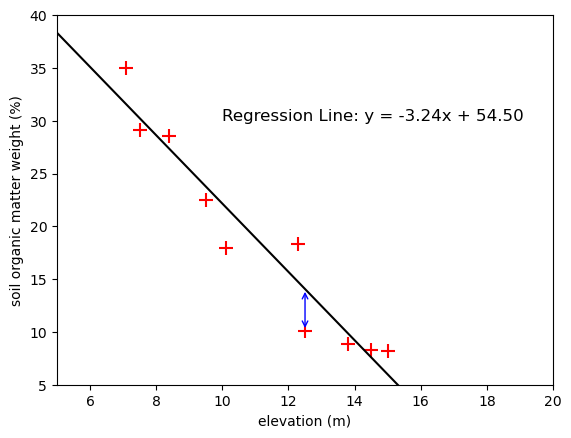

In [5]:
# Define variables
elev = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil = np.array([8.2, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 28.6, 29.1, 35])

# Perform linear regression
slope, intercept = np.polyfit(elev, OMsoil, 1)

print(slope)
print(intercept)

# Create scatterplot
plt.scatter(elev, OMsoil, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([5, 20]), slope * np.array([5, 20]) + intercept, color='black', label='Linear Regression')
plt.xlabel('elevation (m)')
plt.ylabel('soil organic matter weight (%)')
plt.xlim(5, 20)
plt.ylim(5, 40)

# Print the formula for the regression line
plt.text(10, 30, f'Regression Line: y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='black')

# Add annotation with arrow
x_value = 12.5
y_value = slope * x_value + intercept
plt.annotate('', xy=(x_value, y_value), xytext=(x_value, 10.1), arrowprops=dict(arrowstyle='<->', color='blue'))

## Figure 7: A near-horizontal regression line with large deviations may indicate that a relationship between the dependent and independent variable is absent.

0.06701958297200489
10.418093216499908


(0.0, 25.0)

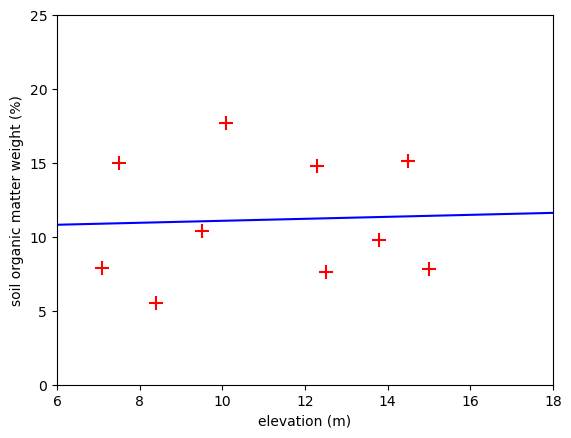

In [6]:
# Define variables
elev = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil = np.array([7.8, 15.1, 9.8, 7.6, 14.8, 17.7, 10.4, 5.5, 15, 7.9])

# Perform linear regression
slope, intercept = np.polyfit(elev, OMsoil, 1)

print(slope)
print(intercept)

# Create scatterplot
plt.scatter(elev, OMsoil, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([5, 20]), slope * np.array([5, 20]) + intercept, color='blue', label='Linear Regression')
plt.xlabel('elevation (m)')
plt.ylabel('soil organic matter weight (%)')
plt.xlim(6, 18)
plt.ylim(0, 25)


## Figure 8: Plots of a the total variance, estimated variance and residual variance for a regression.

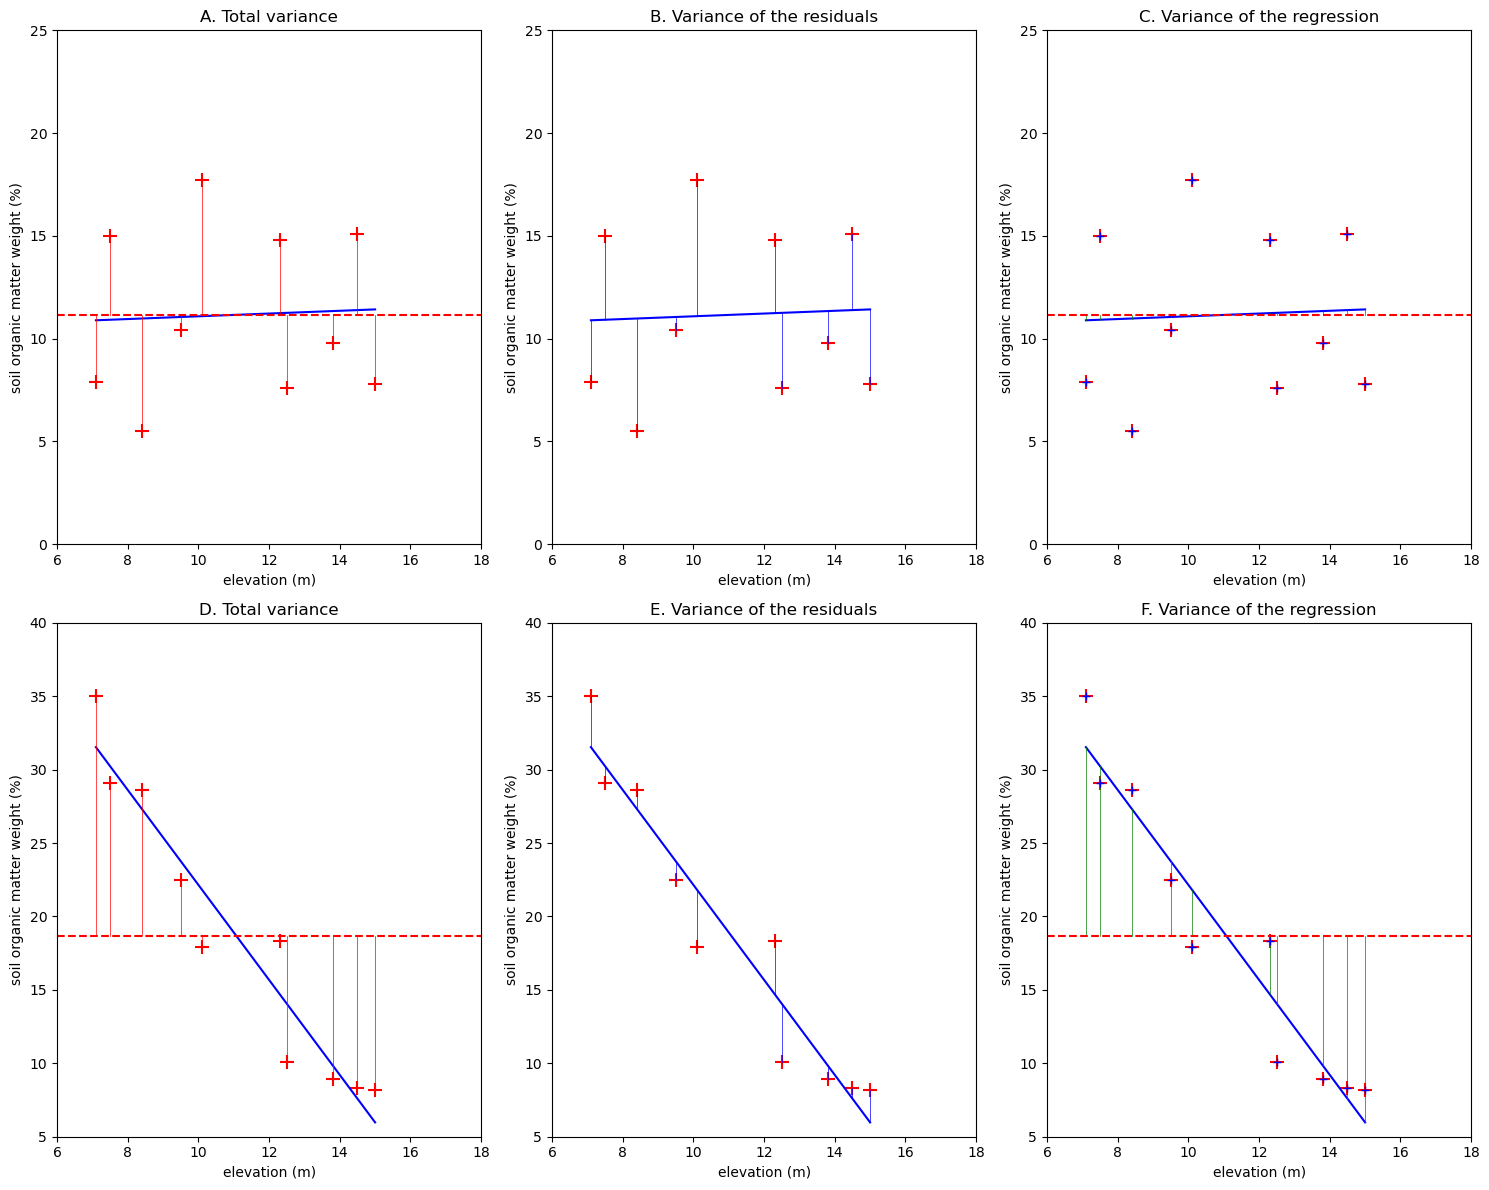

In [7]:
# Variables and regression
# Dataset 1
elev = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil = np.array([7.8, 15.1, 9.8, 7.6, 14.8, 17.7, 10.4, 5.5, 15, 7.9])
slope, intercept = np.polyfit(elev, OMsoil, 1)
mean_omsoil = np.mean(OMsoil)

# Dataset 2
elev_2 = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil_2 = np.array([8.2, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 28.6, 29.1, 35])
slope_2, intercept_2 = np.polyfit(elev_2, OMsoil_2, 1)
mean_omsoil_2 = np.mean(OMsoil_2)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 12))

# Plot A
axs[0, 0].scatter(elev, OMsoil, marker = '+', s = 100, color = "red")
axs[0, 0].plot(elev, slope * elev + intercept, color='blue', label='Linear Regression')
axs[0, 0].axhline(y=mean_omsoil, color='red', linestyle='--', label='Mean OM Soil')
for i in range(len(elev)):
    axs[0, 0].plot([elev[i], elev[i]], [OMsoil[i], mean_omsoil], color='red', linestyle='-', linewidth=0.5)
axs[0, 0].set_title('A. Total variance')
axs[0, 0].set_xlabel('elevation (m)')
axs[0, 0].set_ylabel('soil organic matter weight (%)')
axs[0, 0].set_xlim(6, 18)
axs[0, 0].set_ylim(0, 25)

# Plot B
axs[0, 1].scatter(elev, OMsoil, marker = '+', s = 100, color = "red")
axs[0, 1].plot(elev, slope * elev + intercept, color='blue', label='Linear Regression')
for i in range(len(elev)):
    axs[0, 1].plot([elev[i], elev[i]], [OMsoil[i], slope * elev[i] + intercept], color='blue', linestyle='-', linewidth=0.5)
axs[0, 1].set_title('B. Variance of the residuals')
axs[0, 1].set_xlabel('elevation (m)')
axs[0, 1].set_ylabel('soil organic matter weight (%)')
axs[0, 1].set_xlim(6, 18)
axs[0, 1].set_ylim(0, 25)

# Plot C
axs[0, 2].scatter(elev, OMsoil, marker = '+', s = 100, color = "red")
axs[0, 2].plot(elev, slope * elev + intercept, color='blue', label='Linear Regression')
for i in range(len(elev)):
    axs[0, 2].plot([elev[i], elev[i]], [mean_omsoil, slope * elev[i] + intercept], color='green', linestyle='-', linewidth=0.5)
axs[0, 2].plot(elev, OMsoil, '+', color='blue')
axs[0, 2].axhline(y=mean_omsoil, color='red', linestyle='--', label='Mean OM Soil')
axs[0, 2].set_title('C. Variance of the regression')
axs[0, 2].set_xlabel('elevation (m)')
axs[0, 2].set_ylabel('soil organic matter weight (%)')
axs[0, 2].set_xlim(6, 18)
axs[0, 2].set_ylim(0, 25)

# Plot D
axs[1, 0].scatter(elev_2, OMsoil_2, marker = '+', s = 100, color = "red")
axs[1, 0].plot(elev_2, slope_2 * elev_2 + intercept_2, color='blue', label='Linear Regression')
axs[1, 0].axhline(y=mean_omsoil_2, color='red', linestyle='--', label='Mean OM Soil')
for i in range(len(elev_2)):
    axs[1, 0].plot([elev_2[i], elev_2[i]], [OMsoil_2[i], mean_omsoil_2], color='red', linestyle='-', linewidth=0.5)
axs[1, 0].set_title('D. Total variance')
axs[1, 0].set_xlabel('elevation (m)')
axs[1, 0].set_ylabel('soil organic matter weight (%)')
axs[1, 0].set_xlim(6, 18)
axs[1, 0].set_ylim(5, 40)

# Plot E
axs[1, 1].scatter(elev_2, OMsoil_2, marker = '+', s = 100, color = "red")
axs[1, 1].plot(elev_2, slope_2 * elev_2 + intercept_2, color='blue', label='Linear Regression')
for i in range(len(elev_2)):
    axs[1, 1].plot([elev_2[i], elev_2[i]], [OMsoil_2[i], slope_2 * elev_2[i] + intercept_2], color='blue', linestyle='-', linewidth=0.5)
axs[1, 1].set_title('E. Variance of the residuals')
axs[1, 1].set_xlabel('elevation (m)')
axs[1, 1].set_ylabel('soil organic matter weight (%)')
axs[1, 1].set_xlim(6, 18)
axs[1, 1].set_ylim(5, 40)

# Plot F
axs[1, 2].scatter(elev_2, OMsoil_2, marker = '+', s = 100, color = "red")
axs[1, 2].plot(elev_2, slope_2 * elev_2 + intercept_2, color='blue', label='Linear Regression')
for i in range(len(elev_2)):
    axs[1, 2].plot([elev_2[i], elev_2[i]], [mean_omsoil_2, slope_2 * elev_2[i] + intercept_2], color='green', linestyle='-', linewidth=0.5)
axs[1, 2].plot(elev_2, OMsoil_2, '+', color='blue')
axs[1, 2].axhline(y=mean_omsoil_2, color='red', linestyle='--', label='Mean OM Soil')
axs[1, 2].set_title('F. Variance of the regression')
axs[1, 2].set_xlabel('elevation (m)')
axs[1, 2].set_ylabel('soil organic matter weight (%)')
axs[1, 2].set_xlim(6, 18)
axs[1, 2].set_ylim(5, 40)

# Adjust layout
plt.tight_layout()

## Figure 9: Covariance and correlation example with polynomial curve

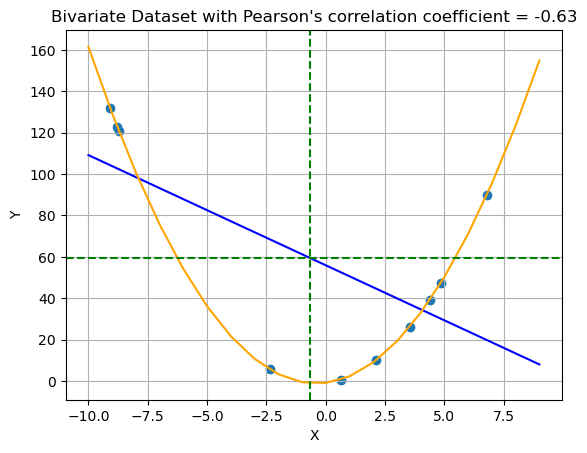

In [8]:
# Define parameters
num_samples = 10
x_range = (-10, 10)

# Generate x values
random.seed(5)
x = np.random.uniform(x_range[0], x_range[1], num_samples)

# Compute y values based on a quadratic function of x plus
a, b, c = np.random.uniform(-2, 2, 3) # coefficients for the quadratic function
y = a * x**2 + b * x + c

# Check the actual correlation coefficient
correlation_coefficient2, p_value2 = pearsonr(x, y)

# Fit a linear regression to the data
slope, intercept = np.polyfit(x, y, 1)

# Fit a second-order polynomial curve to the data
smoothed_y = np.polyval((a, b, c), range(-10, 10))

# Calculate mean values of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a mask for points above and below mean values
mask_above = (x > mean_x) & (y > mean_y)
mask_below = (x < mean_x) & (y < mean_y)

# Plot the data with different colors
import matplotlib.pyplot as plt

plt.scatter(x, y, label = 'negative covariance contribution') # Plot points
plt.plot(range(-10, 10), slope * range(-10, 10) + intercept, color='blue', label='Linear Regression') # Plot the linear regression line
plt.plot(range(-10, 10), smoothed_y, color='orange', label='Smoothed Curve') # Plot polynomial function through points
plt.axhline(mean_y, color='green', linestyle='--', label='Mean Y')
plt.axvline(mean_x, color='green', linestyle='--', label='Mean X')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Dataset with Pearson\'s correlation coefficient = ' + str(round(correlation_coefficient2, 2)))
plt.grid(True)
plt.show()

## Figure 10: Linear regression through a dataset before and after outlier detection

Text(10, 30, 'Regression Line with outliers:\ny = -3.24x + 54.50\nPearsons r = -0.96')

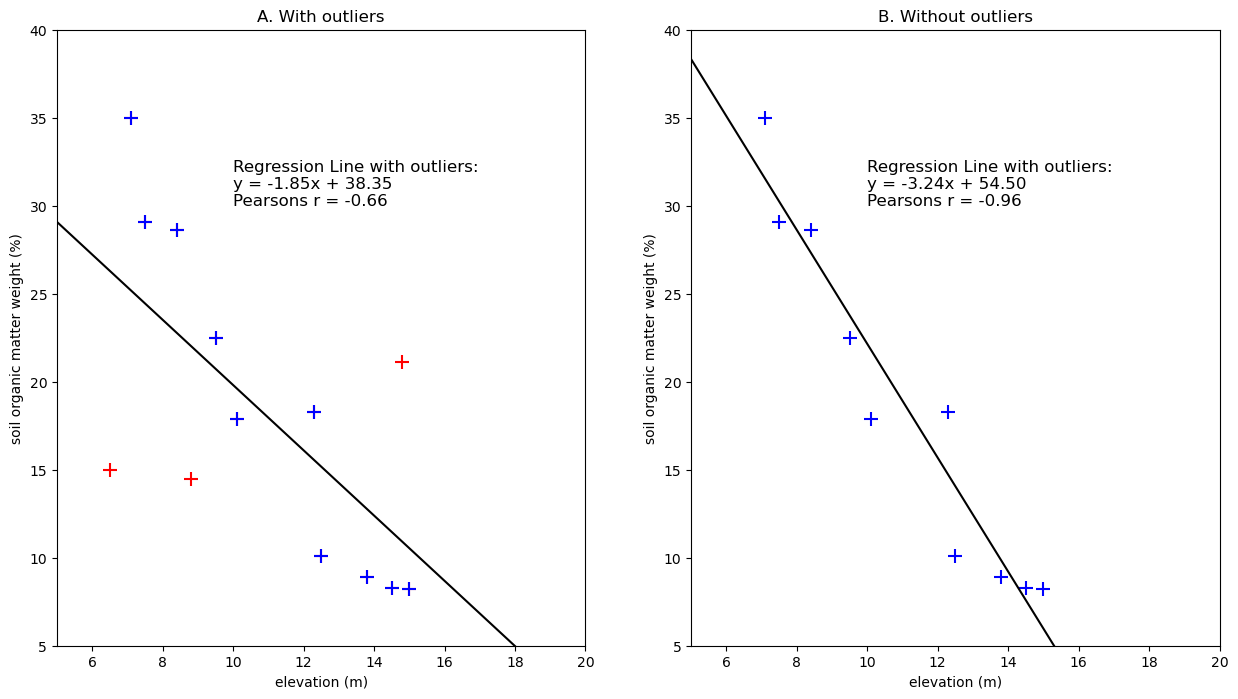

In [9]:
# Define variables
elev = np.array([15, 14.8, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.8, 8.4, 7.5, 7.1, 6.5])
OMsoil = np.array([8.2, 21.1, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 14.5, 28.6, 29.1, 35, 15])

# Perform linear regression
slope, intercept = np.polyfit(elev, OMsoil, 1)

# Check the correlation coefficient with outliers
correlation_coefficient, p_value = pearsonr(elev, OMsoil)

# Remove outliers
elev_clean = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil_clean = np.array([8.2, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 28.6, 29.1, 35])

# Perform linear regression
slope_clean, intercept_clean = np.polyfit(elev_clean, OMsoil_clean, 1)

# Check the correlation coefficient with outliers
correlation_coefficient_clean, p_value_clean = pearsonr(elev_clean, OMsoil_clean)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot A
axs[0].scatter(elev, OMsoil, marker = '+', s = 100, color = "red") # Plot points
axs[0].scatter(elev_clean, OMsoil_clean, marker = '+', s = 100, color = "blue") # Plot non-outliers
axs[0].plot(np.array([5, 20]), slope * np.array([5, 20]) + intercept, color='black', label='Linear Regression')
axs[0].set_title('A. With outliers')
axs[0].set_xlabel('elevation (m)')
axs[0].set_ylabel('soil organic matter weight (%)')
axs[0].set_xlim(5, 20)
axs[0].set_ylim(5, 40)

# Print the formula for the regression line
axs[0].text(10, 30, f'Regression Line with outliers:\ny = {slope:.2f}x + {intercept:.2f}\nPearsons r = {correlation_coefficient:.2f}', fontsize=12, color='black')

# # Plot B
axs[1].scatter(elev_clean, OMsoil_clean, marker = '+', s = 100, color = "blue") # Plot non-outliers
axs[1].plot(np.array([5, 20]), slope_clean * np.array([5, 20]) + intercept_clean, color='black', label='Linear Regression')
axs[1].set_title('B. Without outliers')
axs[1].set_xlabel('elevation (m)')
axs[1].set_ylabel('soil organic matter weight (%)')
axs[1].set_xlim(5, 20)
axs[1].set_ylim(5, 40)

# Print the formula for the regression line
axs[1].text(10, 30, f'Regression Line with outliers:\ny = {slope_clean:.2f}x + {intercept_clean:.2f}\nPearsons r = {correlation_coefficient_clean:.2f}', fontsize=12, color='black')

## Figure 12: Transformed exponential relationship example A

The regression coefficients are:
 Intercept   -1008.320818
df.Year         0.685790
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                df.pCO2   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     613.5
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.87e-51
Time:                        11:22:11   Log-Likelihood:                -551.53
No. Observations:                 133   AIC:                             1107.
Df Residuals:                     131   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

Text(0.5, 1.0, 'Atmospheric CO2 concentration over time')

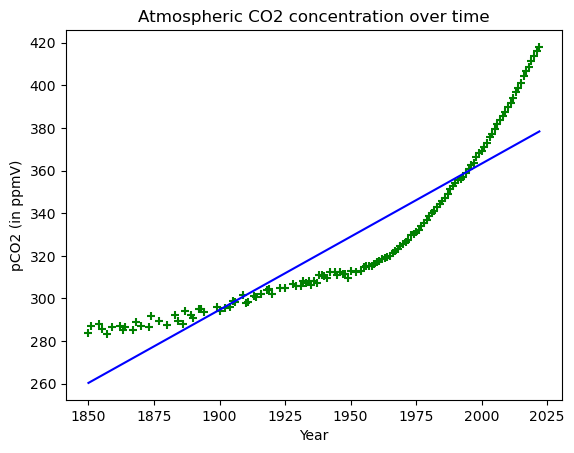

In [19]:
# load CO2 vs temperature data
df = pd.read_csv('CO2_temperature.csv') # Load the second dataset for this assignment in the Jupyter environment.

# Create linear regression between pCO2 and Year in dataset df
linregression = smf.ols(formula = "df.pCO2 ~ df.Year", data = df).fit()

# Print the regression coefficients of the new linear regression
print('The regression coefficients are:\n', linregression.params)

# Print the regression summary to check the strength and the significance of the linear model
print(linregression.summary())

# Plot pCO2 vs time (Plot A)
plt.scatter(df.Year, df.pCO2, color = 'green', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (in ppmV)')
plt.plot(df.Year, linregression.params[0] + linregression.params[1] * df.Year, color = 'blue')
plt.title('Atmospheric CO2 concentration over time')

## Figure 13: Transformed exponential relationship example B

                            OLS Regression Results                            
Dep. Variable:             logCO2_rel   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     5689.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          8.41e-110
Time:                        11:39:04   Log-Likelihood:                 77.814
No. Observations:                 133   AIC:                            -151.6
Df Residuals:                     131   BIC:                            -145.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7155      0.027     64.059      0.0

Text(0.5, 1.0, 'Natural logarithm of atmospheric CO2 concentration over time')

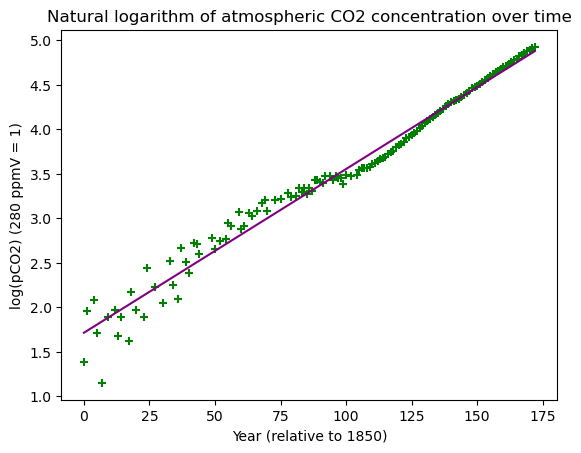

In [38]:
# Create relative pCO2 and Year variables
df.pCO2rel = df.pCO2 - 280
df.Yearrel = df.Year - 1850

df.logCO2_rel = np.log(pCO2rel) # Create a new variable that is the natural logarithm of the modified pCO2 variable

expreg = smf.ols(formula = "logCO2_rel ~ Yearrel", data = df).fit() # Perform the 'exponential' regression in its linearized form

print(expreg.summary()) # Print the regression summary

c2 = np.exp(expreg.params[0]) # Calculate the parameter c by taking the natural exponent

# Plot log(pCO2) vs time (Plot B)
plt.scatter(df.Yearrel, df.logCO2_rel, color = 'green', marker = '+')
plt.xlabel('Year (relative to 1850)')
plt.ylabel('log(pCO2) (280 ppmV = 1)')
plt.plot(df.Yearrel, expreg.params[0] + expreg.params[1] * df.Yearrel, color = 'purple')
plt.title('Natural logarithm of atmospheric CO2 concentration over time')

## Figure 14: Transformed exponential relationship example C

Text(0.5, 1.0, 'Atmospheric CO2 concentration over time')

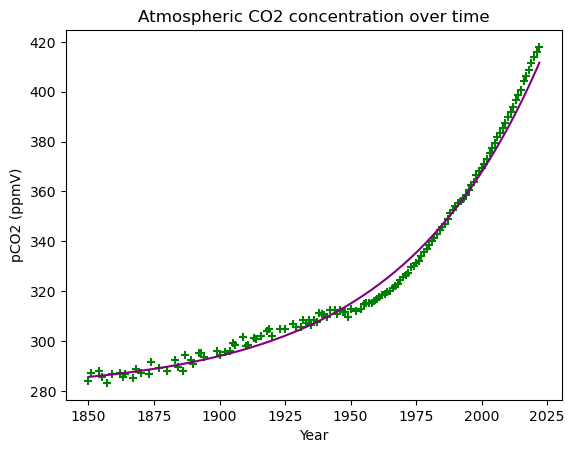

In [35]:
# Plot the exponential model on top of the pCO2 data (Plot C)
plt.scatter(df.Year, df.pCO2, color = 'green', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (ppmV)')
plt.plot(df.Year, np.exp(expreg.params[0]) * np.exp(expreg.params[1] * (df.Yearrel)) + 280, color = 'purple')
plt.title('Atmospheric CO2 concentration over time')

## Figure 17: Simple linear regression result depends on which of the variables is considered the independent variable.

Text(10, 25, 'Regression 2: GS = -0.24 * SR + 15.16')

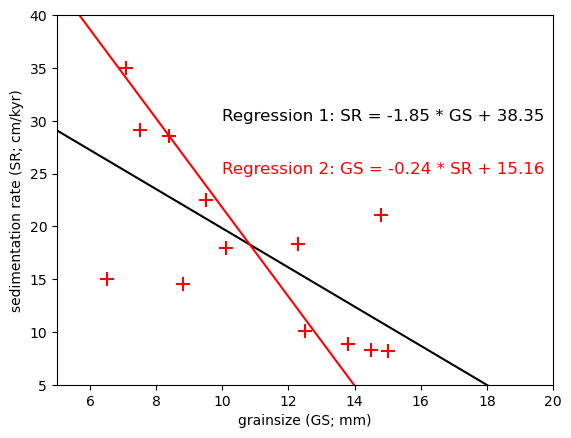

In [30]:
# Define variables (same as Figure 5)
grainsize = np.array([15, 14.8, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.8, 8.4, 7.5, 7.1, 6.5])
sedrate = np.array([8.2, 21.1, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 14.5, 28.6, 29.1, 35, 15])

# Perform linear regression in two directions
slope1, intercept1 = np.polyfit(grainsize, sedrate, 1)
slope2, intercept2 = np.polyfit(sedrate, grainsize, 1)

# Create scatterplot
plt.scatter(grainsize, sedrate, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([5, 20]), slope1 * np.array([5, 20]) + intercept1, color='black', label='Linear Regression 1: sedimentation rate ~ grain size')
plt.plot(np.array([5, 20]), (np.array([5, 20]) - intercept2) / slope2, color='red', label='Linear Regression 2: grain size ~ Sedimentation rate')
plt.xlabel('grainsize (GS; mm)')
plt.ylabel('sedimentation rate (SR; cm/kyr)')
plt.xlim(5, 20)
plt.ylim(5, 40)

# Print the formula for the regression line
plt.text(10, 30, f'Regression 1: SR = {slope1:.2f} * GS + {intercept1:.2f}', fontsize=12, color='black')
plt.text(10, 25, f'Regression 2: GS = {slope2:.2f} * SR + {intercept2:.2f}', fontsize=12, color='red')

## Figure 19: Simple linear regression result with two different choices of independent variables and the major axis.

Text(10, 22.5, 'Regression 2: GS = -0.24 * SR + 15.16')

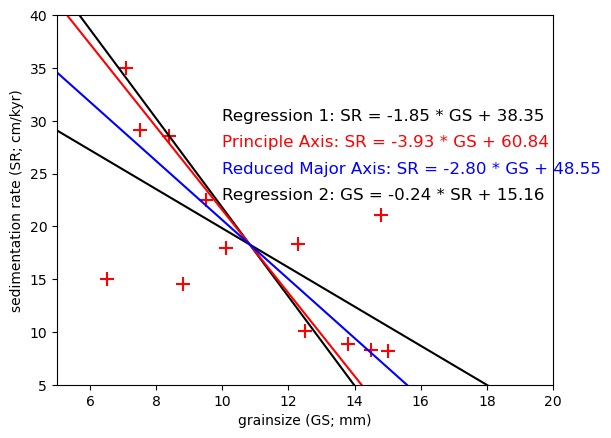

In [37]:
# Define variables (same as Figure 5)
grainsize = np.array([15, 14.8, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.8, 8.4, 7.5, 7.1, 6.5])
sedrate = np.array([8.2, 21.1, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 14.5, 28.6, 29.1, 35, 15])

# Perform linear regression in two directions
slope1, intercept1 = np.polyfit(grainsize, sedrate, 1)
slope2, intercept2 = np.polyfit(sedrate, grainsize, 1)

# Find principle axis
X = np.column_stack((grainsize, sedrate)) # combine variables in array
pca = PCA(n_components = 2) # Initiate PCA for two variables
pca.fit(X) # Use data in X to find principle axes
slope3 = pca.components_[0, 1] / pca.components_[0, 0] # Find slope of the principle axis
intercept3 = np.mean(sedrate) - slope3 * np.mean(grainsize) # Find intercept of the principle axis

# Find reduced major axis
slope4 = np.sign(pearsonr(grainsize, sedrate)[0]) * np.std(sedrate) / np.std(grainsize) # Find slope of the reduced major axis
intercept4 = np.mean(sedrate) - slope4 * np.mean(grainsize) # Find intercept of the reduced major axis

# Create scatterplot
plt.scatter(grainsize, sedrate, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([5, 20]), slope1 * np.array([5, 20]) + intercept1, color='black', label='Linear Regression 1: sedimentation rate ~ grain size')
plt.plot(np.array([5, 20]), (np.array([5, 20]) - intercept2) / slope2, color='black', label='Linear Regression 2: grain size ~ Sedimentation rate')
plt.plot(np.array([5, 20]), slope3 * np.array([5, 20]) + intercept3, color='red', label='Principle axis')
plt.plot(np.array([5, 20]), slope4 * np.array([5, 20]) + intercept4, color='blue', label='Rediced Major axis')
plt.xlabel('grainsize (GS; mm)')
plt.ylabel('sedimentation rate (SR; cm/kyr)')
plt.xlim(5, 20)
plt.ylim(5, 40)

# Print the formula for the regression line
plt.text(10, 30, f'Regression 1: SR = {slope1:.2f} * GS + {intercept1:.2f}', fontsize=12, color='black')
plt.text(10, 27.5, f'Principle Axis: SR = {slope3:.2f} * GS + {intercept3:.2f}', fontsize=12, color='red')
plt.text(10, 25, f'Reduced Major Axis: SR = {slope4:.2f} * GS + {intercept4:.2f}', fontsize=12, color='blue')
plt.text(10, 22.5, f'Regression 2: GS = {slope2:.2f} * SR + {intercept2:.2f}', fontsize=12, color='black')

## Figure 21: Linear regression with a binary independent variable 

[0 0 0 0 0 0 1 1 1 1 1 1 1]


Text(0.1, 190, 'Height = -15.19 * dummy + 182.3\nPearsons r = -0.58\np-value = 0.04')

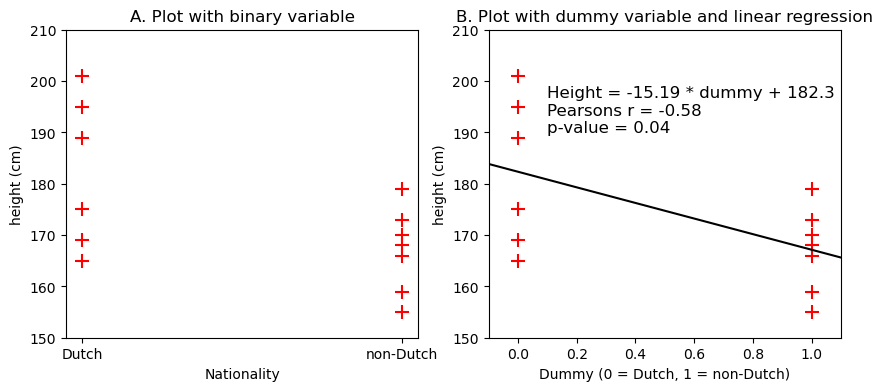

In [68]:
# Define variables
nationality = np.array(["Dutch", "Dutch", "Dutch", "Dutch", "Dutch", "Dutch", "non-Dutch", "non-Dutch", "non-Dutch", "non-Dutch", "non-Dutch", "non-Dutch", "non-Dutch"])
height = np.array([175, 165, 169, 189, 201, 195, 159, 173, 179, 166, 155, 168, 170])

# Create dummy variable
dummy = np.where(nationality == "Dutch", 0, 1)

# Perform linear regression with dummy variable
slope, intercept = np.polyfit(dummy, height, 1)

# Check the correlation coefficient and significance of the regression
correlation_coefficient, p_value = pearsonr(dummy, height)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot A
axs[0].scatter(nationality, height, marker = '+', s = 100, color = "red") # Plot points
axs[0].set_title('A. Plot with binary variable')
axs[0].set_xlabel('Nationality')
axs[0].set_ylabel('height (cm)')
axs[0].set_ylim(150, 210)

# Plot B
axs[1].scatter(dummy, height, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([-0.1, 1.1]), slope * np.array([-0.1, 1.1]) + intercept, color='black') # Plot linear regression result
axs[1].set_title('B. Plot with dummy variable and linear regression')
axs[1].set_xlabel('Dummy (0 = Dutch, 1 = non-Dutch)')
axs[1].set_ylabel('height (cm)')
axs[1].set_ylim(150, 210)
axs[1].set_xlim(-0.1, 1.1)

# # Print the formula for the regression line
plt.text(0.1, 190, f'Height = {slope:.2f} * dummy + {intercept:.1f}\nPearsons r = {correlation_coefficient:.2f}\np-value = {p_value:.2f}', fontsize=12, color='black')

## Figure 22: Linear regression with a binary dependent variable (does not work)

Text(5, 0.7, 'Lung cancer? = 0.03 * dummy -0.32\nPearsons r = 0.85\np-value = 0.00')

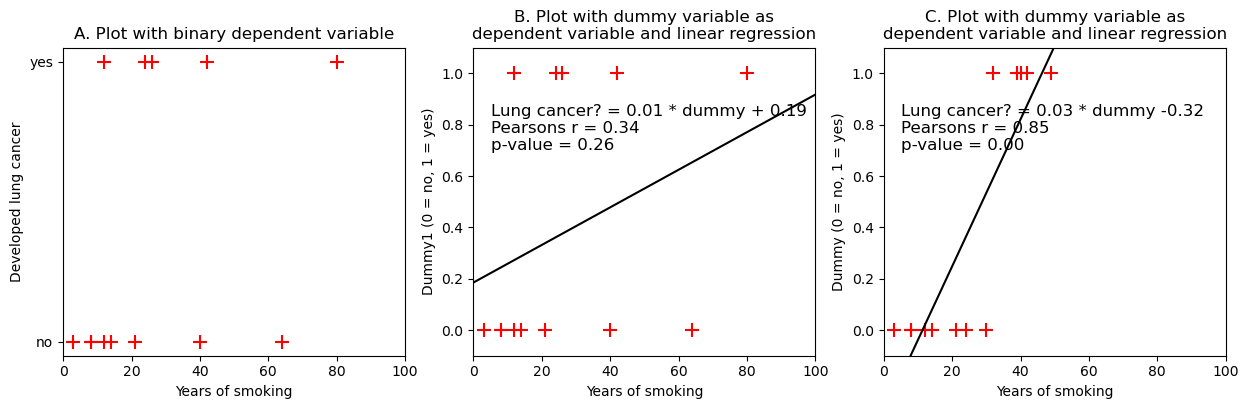

In [16]:
# Define variables
years_smoking1 = np.array([12, 26, 42, 24, 80, 3, 12, 64, 21, 14, 8, 40, 8])
developed_lung_cancer1 = np.array(["yes", "yes", "yes", "yes", "yes", "no", "no", "no", "no", "no", "no", "no", "no"])
years_smoking2 = np.array([32, 39, 42, 49, 40, 3, 12, 24, 21, 14, 8, 30, 8])
developed_lung_cancer2 = np.array(["yes", "yes", "yes", "yes", "yes", "no", "no", "no", "no", "no", "no", "no", "no"])

# Create dummy1 variable
dummy1 = np.where(developed_lung_cancer1 == "no", 0, 1)
dummy2 = np.where(developed_lung_cancer2 == "no", 0, 1)

# Perform linear regression with dummy1 variable
slope1, intercept1 = np.polyfit(years_smoking1, dummy1, 1)
slope2, intercept2 = np.polyfit(years_smoking2, dummy2, 1)

# Check the correlation coefficient and significance of the regression
correlation_coefficient1, p_value1 = pearsonr(years_smoking1, dummy1)
correlation_coefficient2, p_value2 = pearsonr(years_smoking2, dummy2)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot A
axs[0].scatter(years_smoking1, developed_lung_cancer1, marker = '+', s = 100, color = "red") # Plot points
axs[0].set_title('A. Plot with binary dependent variable')
axs[0].set_xlabel('Years of smoking')
axs[0].set_ylabel('Developed lung cancer')
axs[0].invert_yaxis()
axs[0].set_xlim(0, 100)

# Plot B
axs[1].scatter(years_smoking1, dummy1, marker = '+', s = 100, color = "red") # Plot points
axs[1].plot(np.array([0, 100]), slope1 * np.array([0, 100]) + intercept1, color='black') # Plot linear regression result
axs[1].set_title('B. Plot with dummy variable as\ndependent variable and linear regression')
axs[1].set_xlabel('Years of smoking')
axs[1].set_ylabel('Dummy1 (0 = no, 1 = yes)')
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(0, 100)
axs[1].text(5, 0.7, f'Lung cancer? = {slope1:.2f} * dummy + {intercept1:.2f}\nPearsons r = {correlation_coefficient1:.2f}\np-value = {p_value1:.2f}', fontsize=12, color='black')

# Plot C
axs[2].scatter(years_smoking2, dummy2, marker = '+', s = 100, color = "red") # Plot points
axs[2].plot(np.array([0, 100]), slope2 * np.array([0, 100]) + intercept2, color='black') # Plot linear regression result
axs[2].set_title('C. Plot with dummy variable as\ndependent variable and linear regression')
axs[2].set_xlabel('Years of smoking')
axs[2].set_ylabel('Dummy (0 = no, 1 = yes)')
axs[2].set_ylim(-0.1, 1.1)
axs[2].set_xlim(0, 100)
axs[2].text(5, 0.7, f'Lung cancer? = {slope2:.2f} * dummy {intercept2:.2f}\nPearsons r = {correlation_coefficient2:.2f}\np-value = {p_value2:.2f}', fontsize=12, color='black')


## Figure 23: The basic sigmoid function

Text(0, 0.5, 'Y')

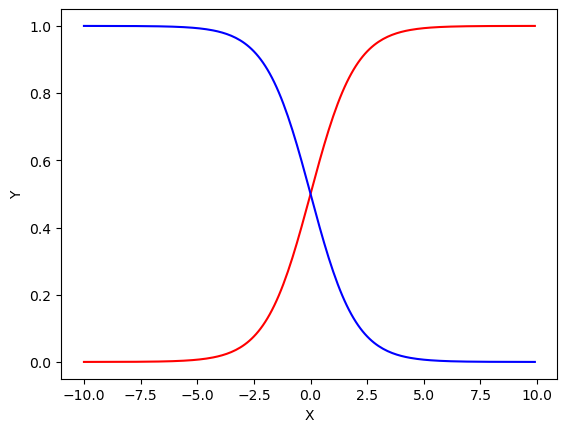

In [26]:
# Define variables
x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-1 * x))
y_neg = 1 - y

# Plot sigmoid curve
# plt.scatter(x, y, marker = '+', s = 100, color = "red") # Plot points
plt.plot(x, y, color = "red") # Plot line
plt.plot(x, y_neg, color = "blue") # Plot line
plt.xlabel('X')
plt.ylabel('Y')

## Figure 24: Logistic regression with a binary dependent variable

In [30]:
# Define variables
years_smoking1 = np.array([12, 26, 42, 24, 80, 3, 12, 64, 21, 14, 8, 40, 8])
developed_lung_cancer1 = np.array(["yes", "yes", "yes", "yes", "yes", "no", "no", "no", "no", "no", "no", "no", "no"])
years_smoking2 = np.array([32, 39, 42, 49, 40, 3, 12, 24, 21, 14, 8, 30, 8])
developed_lung_cancer2 = np.array(["yes", "yes", "yes", "yes", "yes", "no", "no", "no", "no", "no", "no", "no", "no"])

# Create dummy1 variable
dummy1 = np.where(developed_lung_cancer1 == "no", 0, 1)
dummy2 = np.where(developed_lung_cancer2 == "no", 0, 1)

# Perform logistic regression
logit_model1 = sm.Logit(developed_lung_cancer1, years_smoking1).fit()
print(logit_model1.summary2())

# Check the correlation coefficient and significance of the regression
correlation_coefficient1, p_value1 = pearsonr(years_smoking1, dummy1)
correlation_coefficient2, p_value2 = pearsonr(years_smoking2, dummy2)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot A
axs[0].scatter(years_smoking1, developed_lung_cancer1, marker = '+', s = 100, color = "red") # Plot points
axs[0].set_title('A. Plot with binary dependent variable')
axs[0].set_xlabel('Years of smoking')
axs[0].set_ylabel('Developed lung cancer')
axs[0].invert_yaxis()
axs[0].set_xlim(0, 100)

# Plot B
axs[1].scatter(years_smoking1, dummy1, marker = '+', s = 100, color = "red") # Plot points
axs[1].plot(np.array([0, 100]), slope1 * np.array([0, 100]) + intercept1, color='black') # Plot linear regression result
axs[1].set_title('B. Plot with dummy variable as\ndependent variable and linear regression')
axs[1].set_xlabel('Years of smoking')
axs[1].set_ylabel('Dummy1 (0 = no, 1 = yes)')
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(0, 100)
axs[1].text(5, 0.7, f'Lung cancer? = {slope1:.2f} * dummy + {intercept1:.2f}\nPearsons r = {correlation_coefficient1:.2f}\np-value = {p_value1:.2f}', fontsize=12, color='black')

# Plot C
axs[2].scatter(years_smoking2, dummy2, marker = '+', s = 100, color = "red") # Plot points
axs[2].plot(np.array([0, 100]), slope2 * np.array([0, 100]) + intercept2, color='black') # Plot linear regression result
axs[2].set_title('C. Plot with dummy variable as\ndependent variable and linear regression')
axs[2].set_xlabel('Years of smoking')
axs[2].set_ylabel('Dummy (0 = no, 1 = yes)')
axs[2].set_ylim(-0.1, 1.1)
axs[2].set_xlim(0, 100)
axs[2].text(5, 0.7, f'Lung cancer? = {slope2:.2f} * dummy {intercept2:.2f}\nPearsons r = {correlation_coefficient2:.2f}\np-value = {p_value2:.2f}', fontsize=12, color='black')


TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'int'